# Importing Dependancies

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os
import seaborn as sns

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from IPython.display import clear_output
!pip install dtale
!pip install autoviz
clear_output()

In [ ]:
import dtale
import dtale.app as dtale_app

# Helper Functions

In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

# DataFrame

In [ ]:
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-nov-2021/train.csv')

In [ ]:
train_df.head()

In [ ]:
train_df.describe()

# EDA

In [ ]:
dtale_app.USE_NGROK = True
d=dtale.show(train_df)
d.main_url()

## Outputs from the above website : 
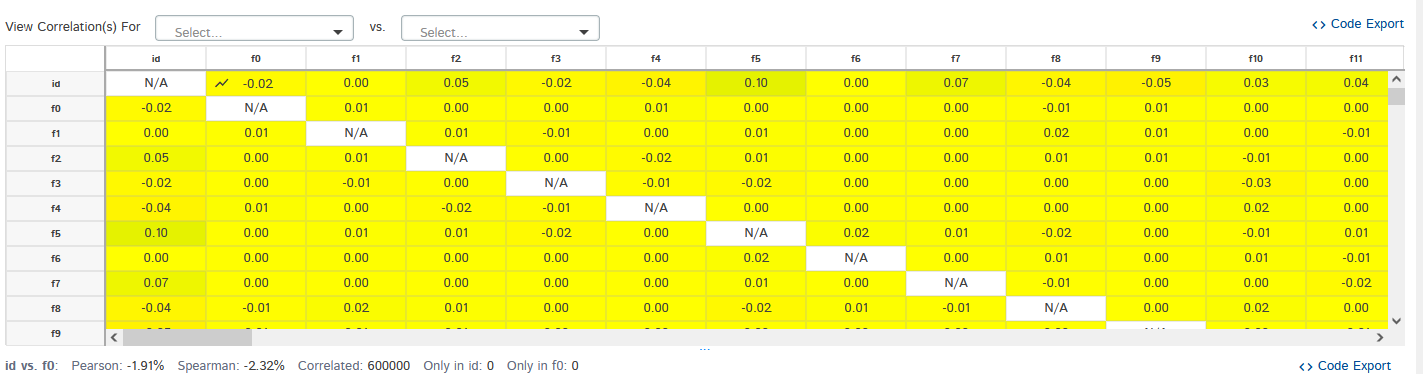
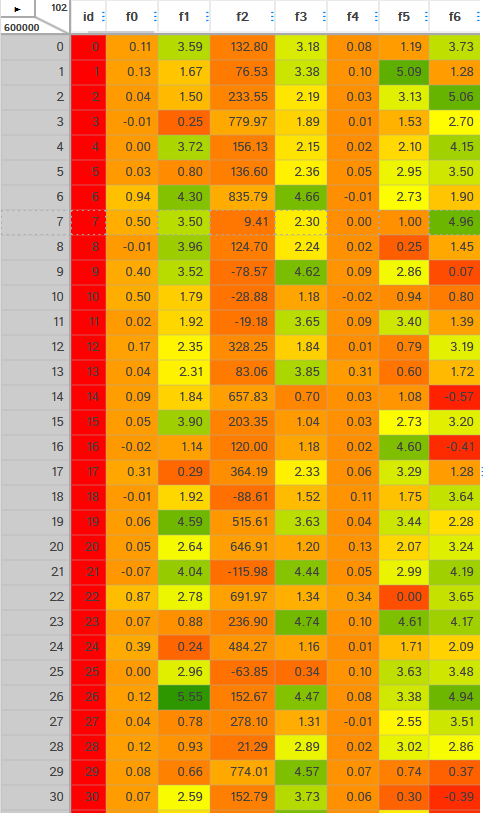
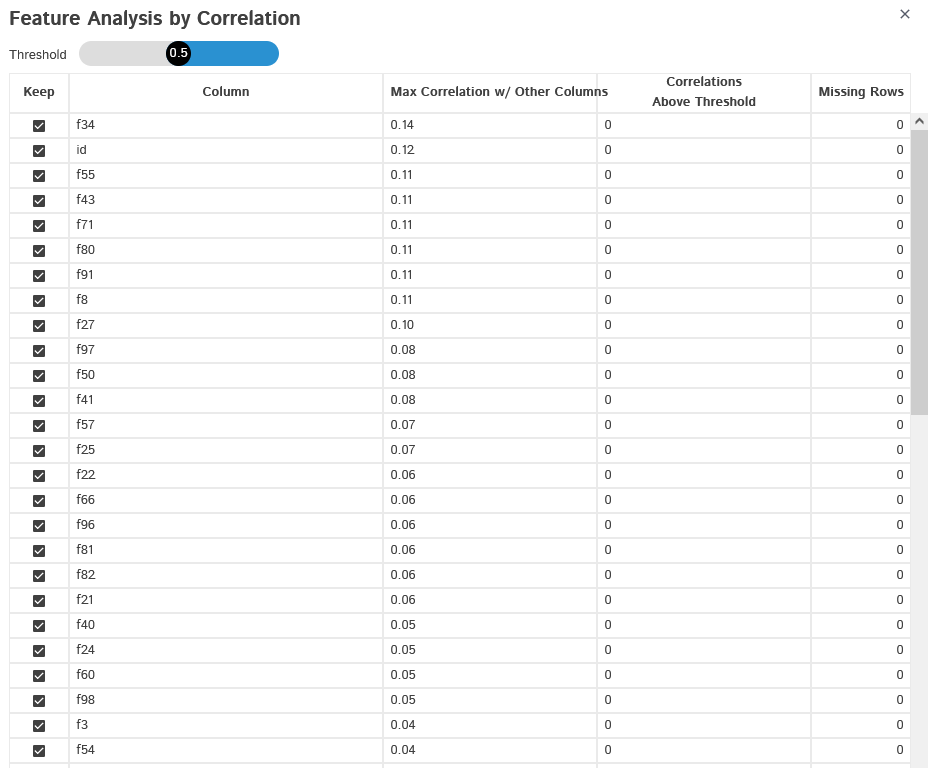
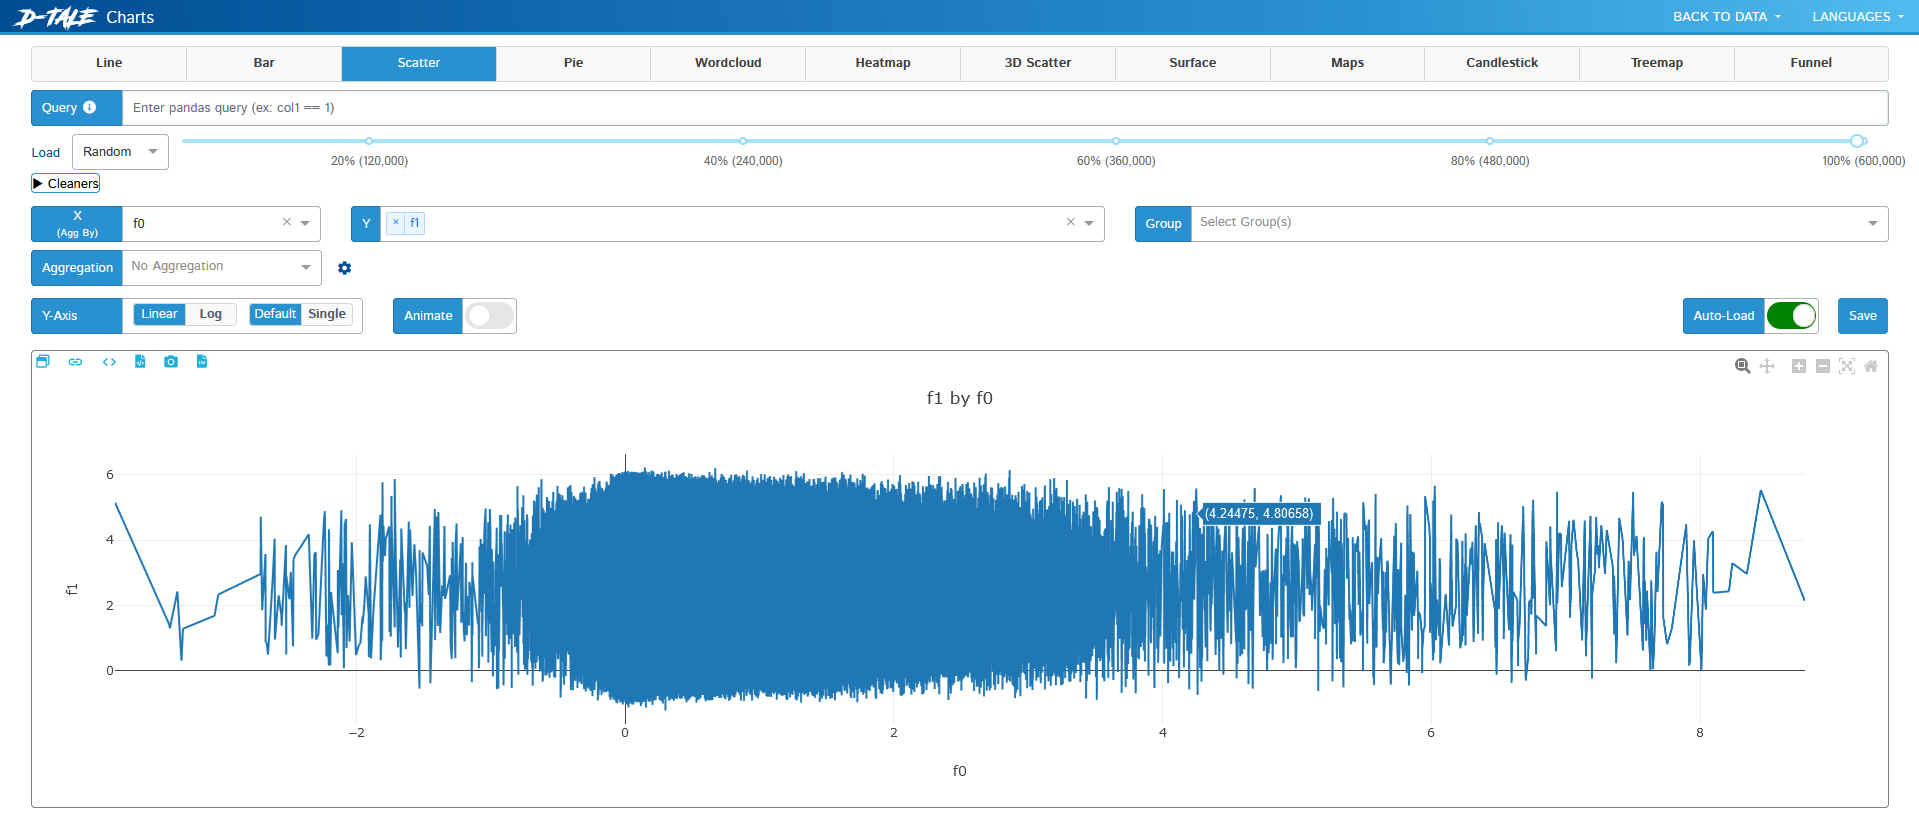

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

# train = X.join(y)

filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="target",
    dfte=train_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

# Modelling

In [ ]:
from sklearn.model_selection import train_test_split
X = train_df.drop(columns = ['id', 'target'])
y = train_df['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.85, random_state = 42)

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

h2o_train = h2o.H2OFrame(train_df)

In [ ]:
train_df

In [ ]:
h2o_train

In [ ]:
h2o_train['target'] = h2o.H2OFrame(y.tolist()).asfactor()

In [ ]:
feature_columns = [x for x in h2o_train.columns if x != 'target']
target_column = 'target'

In [ ]:
aml = H2OAutoML(
    max_models = 50,
    seed = 2021, 
    max_runtime_secs = 8*3600,
    nfolds = 5,
    #exclude_algos = ['GBM']
)

aml.train(
    x = feature_columns, 
    y = target_column, 
    training_frame = h2o_train)

In [ ]:
aml.leaderboard

In [ ]:
# model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:, 0])
# se = h2o.get_model(model_ids[0])
# metalearner = h2o.get_model(se.metalearner()['name'])
# metalearner.std_coef_plot()

test = pd.read_csv('/kaggle/input/tabular-playground-series-nov-2021/test.csv')
h2o_test = h2o.H2OFrame(test)
preds = aml.predict(h2o.H2OFrame(test[feature_columns]))
preds_df = h2o.as_list(preds)
preds_df['id'] = test['id']
preds_df = preds_df.rename(columns = {'p1': 'target'}).filter(items = ['target', 'id'])
preds_df.to_csv('claim_prediction.csv', index = False)

 I will keep udating my notebook this month with everything new that I see and learn in this competion

Do upvote guys if you love the work!! It keeps me motivated and want to work harder :) 


# References

Huge Shoutout to the owners of these notebooks !! Helped me learn a lot<br>
Do check them out 

Dtale : [blue7red](https://www.kaggle.com/rhythmcam/automatic-eda-tool-d-tale-tab-nov-2021)<br>
H2O_AutoMl : [Suharkov](https://www.kaggle.com/suharkov/tps-2021-11-eda-h2o)<br>
AutoViz : [Ankit Kalaun](https://www.kaggle.com/ankitkalauni/tps-nov-21-logistic-regression-autoviz/notebook)<br>